### 라이브러리 임포트

In [11]:
#!pip install koreanize_matplotlib

In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
# 한글폰트 사용을 위해 설치
# 아래 모듈을 설치하고 불러오면 별도의 한글폰트 설정이 필요 없습니다.
# colab 에서도 아래 설치 문구의 주석을 제거하고 설치하고 import 해주기만 하면 한글폰트가 잘 나옵니다.
# !pip install koreanize-matplotlib

import koreanize_matplotlib

### 데이터 불러오기

In [13]:
# df = pd.read_csv("boostcourse-ds-510/data/NHIS_OPEN_GJ_2017.CSV.zip", encoding="cp949")
df = pd.read_csv("https://raw.githubusercontent.com/corazzon/boostcourse-ds-510/master/data/NHIS_OPEN_GJ_2017.CSV.zip",
                 encoding="cp949")

### 📌 Q1. 연령대별 허리둘레에 대한 기술통계를 구하려고 합니다. 다음 제공되는 딕셔너리를 통해 연령대코드(5세단위)를 "연령대"로 만들고 아래와 같은 기술통계값을 구해주세요!

In [14]:
# agg_code를 활용하여 "연령대" 컬럼을 생성한다.
agg_code = {1: '0~4세', 2: '5~9세', 3: '10~14세', 4: '15~19세', 5: '20~24세', 6: '25~29세',
            7: '30~34세', 8: '35~39세', 9: '40~44세', 10: '45~49세', 11: '50~54세', 12: '55~59세',
            13: '60~64세', 14: '65~69세', 15: '70~74세', 16: '75~79세', 17: '80~84세', 18: '85세+'}

df['연령대'] = df['연령대코드(5세단위)'].replace(to_replace=agg_code)

# 새로운 컬럼을 기준으로 "허리둘레"의 기술통계를 확인한다.
df.groupby(by='연령대')['허리둘레'].describe()

,count,mean,std,min,25%,50%,75%,max
연령대,,,,,,,,
20~24세,23244.0,75.152220,12.251781,47.5,67.5,73.4,81.0,999.0
25~29세,64898.0,77.704783,16.735734,48.0,69.0,76.5,84.2,999.0
30~34세,77517.0,81.089268,22.988111,49.0,72.0,80.1,88.0,999.0
35~39세,84621.0,82.094012,14.522095,9.2,75.0,82.0,89.0,999.0
40~44세,130912.0,80.488308,10.803098,42.1,73.0,80.0,87.0,999.0
45~49세,118357.0,80.822449,9.521622,40.0,74.0,81.0,87.0,137.0
50~54세,129833.0,81.062754,9.095438,6.5,75.0,81.0,87.0,142.0
55~59세,112175.0,81.799905,8.730398,32.0,76.0,82.0,87.5,139.0
60~64세,106491.0,82.722769,8.596176,0.0,77.0,83.0,88.0,137.0


### 📌Q2. "음주여부", "흡연상태", "연령대코드(5세단위)", "성별코드"에 대한 상관계수를 구하고 시각화 해주세요.
- 다음의 결과가 나오도록 합니다. 이 때 그래프의 색상, 스타일 표현방식에 차이가 있더라도 상관계수값이 차이가 없다면 문제 없습니다.

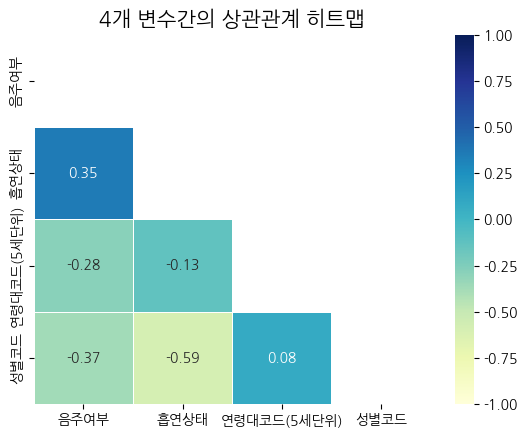

In [15]:
# 데이터프레임에서 상관관계 행렬 추출
df_corr = df[['음주여부', '흡연상태', '연령대코드(5세단위)', '성별코드']].corr()

# 히트맵의 아랫부분을 가리기 위한 mask 생성
mask = np.triu(np.ones_like(df_corr, dtype=np.bool_))

plt.title('4개 변수간의 상관관계 히트맵', fontsize=15)

sns.heatmap(df_corr, vmax=1, vmin=-1, annot=True, fmt='.2f', cmap='YlGnBu', linewidth=0.5, mask=mask)
plt.show()

### 📌 Q3. 흡연하는 사람과 음주하는 사람들의 수는 얼마나 차이가 있을까요?
- 건강보험에서 제공하고 있는 데이터는 용량을 줄이기 위해 대부분의 데이터를 숫자 형태로 제공하고 있습니다. replace 기능을 사용하면 딕셔너리의 값을 의미하는 문자 형태로 변경해 볼 수 있습니다. 다음 제공되는 딕셔너리 값을 사용하여 숫자가 의미하는 문자 형태로 변경한 뒤 전체 데이터에서 음주와 흡연에 대한 교차 테이블을 구해 각 해당 빈도수를 구하고 시각화 해주세요!

In [16]:
# 흡연 1(피우지 않는다), 2(이전에 피웠으나 끊었다), 3(현재도 피우고 있다)
# 음주 0(마시지 않은다), 1(마신다)
smoke = {1 : "흡연안함", 2: "끊음", 3: "흡연중"}
drink = {0: "안마심", 1: "마심"}

df['흡연상태'] = df['흡연상태'].replace(to_replace=smoke)
df['음주여부'] = df['음주여부'].replace(to_replace=drink)

#result_df = df.pivot_table(index='음주여부', columns='흡연상태', aggfunc='size', fill_value=0)

df.pivot_table(index='음주여부', columns='흡연상태', aggfunc='size')

흡연상태,끊음,흡연안함,흡연중
음주여부,,,
마심,120779,213743,162166
안마심,55334,394503,52845


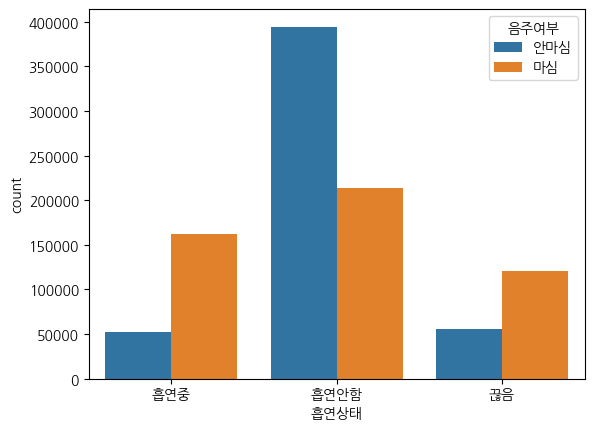

In [17]:
# 막대그래프 시각화
sns.countplot(data=df, x='흡연상태', hue='음주여부')
plt.show()

### 📌 Q4. 체중이 120Kg 이상인 데이터를 찾아 "총콜레스테롤", "감마지티피" 값을 음주여부에 따라 산점도로 시각화해주세요!
- 체중이 120Kg 이 넘는다면 비만으로 건강관리가 필요합니다. 120Kg 이상인 데이터를 찾아 "총콜레스테롤", "감마지티피" 값을 음주여부에 따라 산점도로 시각화해주세요! (이때 120Kg 도 포함되게 구합니다.) 그래프의 설정과 seaborn 버전에 따라 여백이나 회귀선의 시작과 끝점에 차이가 있을 수 있습니다.

In [18]:
df_weight = df[df['체중(5Kg 단위)'] >= 120][['총콜레스테롤','감마지티피','음주여부','흡연상태']]

# 흡연상태에 따른 데이터프레임 분리
df_weight_none = df_weight[df_weight['흡연상태'] == '흡연안함']
df_weight_stop = df_weight[df_weight['흡연상태'] == '끊음']
df_weight_ing = df_weight[df_weight['흡연상태'] == '흡연중']

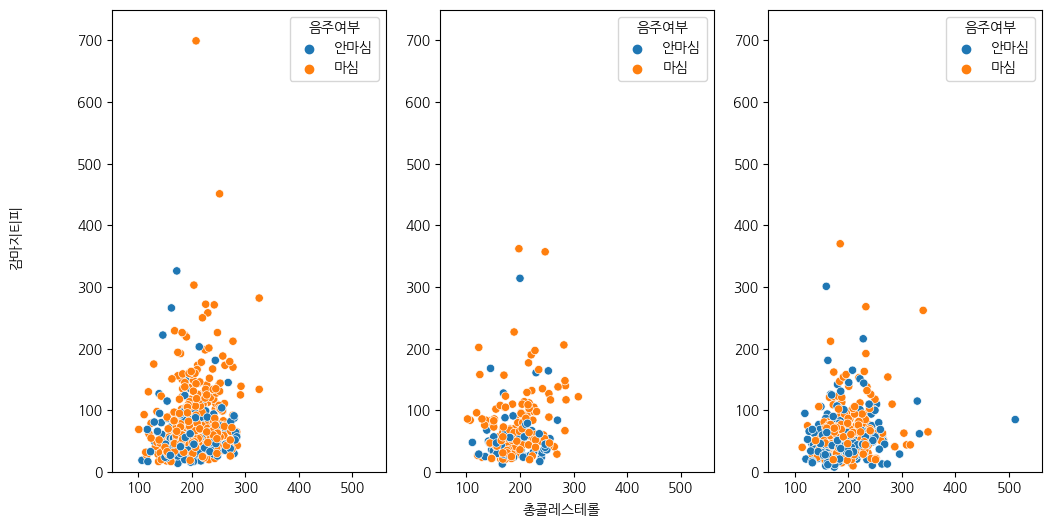

In [19]:
fig, ax = plt.subplots(ncols=3, figsize=(12, 6))

sns.scatterplot(x='총콜레스테롤', y='감마지티피', data=df_weight_ing, hue='음주여부', ax=ax[0])
sns.scatterplot(x='총콜레스테롤', y='감마지티피', data=df_weight_stop, hue='음주여부', ax=ax[1])
sns.scatterplot(x='총콜레스테롤', y='감마지티피', data=df_weight_none, hue='음주여부', ax=ax[2])

fig.text(0.5, 0.04, '총콜레스테롤', ha='center')
fig.text(0.04, 0.5, '감마지티피', va='center', rotation='vertical')

for i in ax:
    i.set_xlabel('')
    i.set_ylabel('')
    i.set_xlim(df_weight['총콜레스테롤'].min()-50, df_weight['총콜레스테롤'].max()+50)
    i.set_ylim(0, df_weight['감마지티피'].max()+50)

plt.show()

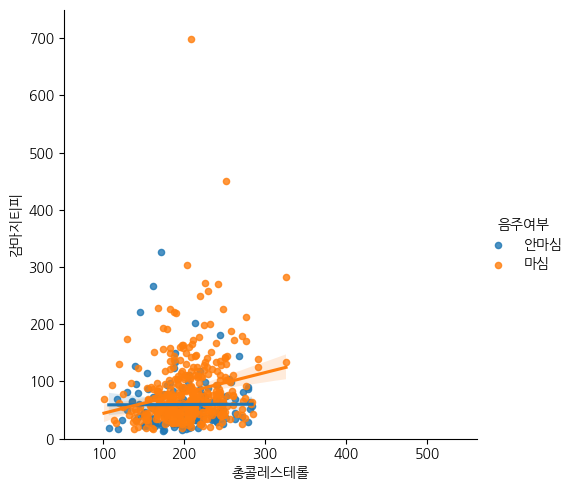

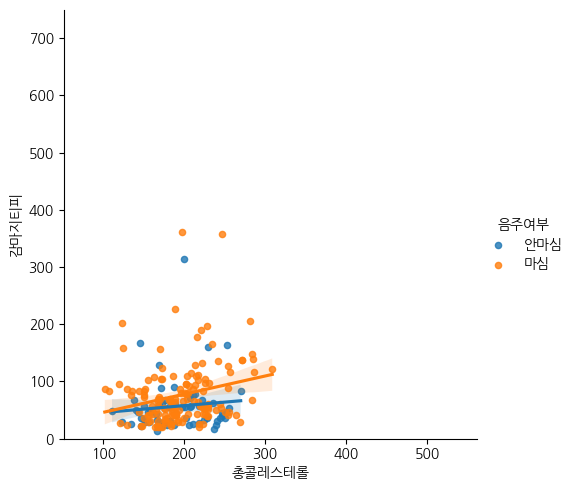

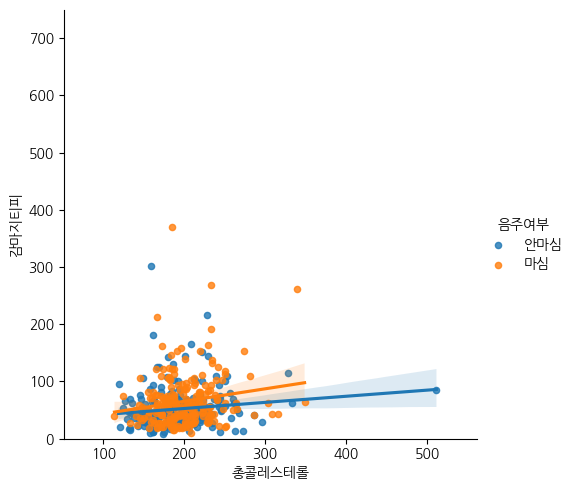

In [20]:
# 각 서브플롯에 lmplot 그리기
lm1 = sns.lmplot(x='총콜레스테롤', y='감마지티피', data=df_weight_ing, hue='음주여부', scatter_kws={"s": 20})
lm2 = sns.lmplot(x='총콜레스테롤', y='감마지티피', data=df_weight_stop, hue='음주여부', scatter_kws={"s": 20})
lm3 = sns.lmplot(x='총콜레스테롤', y='감마지티피', data=df_weight_none, hue='음주여부', scatter_kws={"s": 20})

# FacetGrid 객체를 사용하여 ylim 설정
for lm in [lm1, lm2, lm3]:
    lm.set(xlim=(df_weight['총콜레스테롤'].min()-50, df_weight['총콜레스테롤'].max()+50), ylim=(0, df_weight['감마지티피'].max() + 50))

plt.show()

### 📌 Q5. 연령대별로 시력은 얼마나 차이가 날까요? 연령대, 성별 좌우 평균 시력을 시각화 해주세요!
- 시력은 0.1~2.5 사이의 값으로 표기하며 0.1 이하의 시력은 0.1, 실명은 9.9로 표기합니다.
- 실명인 데이터를 평균에 포함하게 되면 시력에 대한 평균을 제대로 구하기 어렵습니다. 실명 데이터를 제외하고 연령대, 성별에 따른 평균 좌우 시력을 구해주세요!
- 서브플롯으로 시각화하여 표현해 주고 matplotlib 에 대한 사용법은 다음의 영상도 함께 참고해 주세요! (https://www.youtube.com/watch?v=ZTRKojTLE8M)
- 시각화 예시는 참고사항으로 스타일이나 폰트 구성이 달라도 연령대, 성별 좌우평균시력을 시각화 하면 됩니다.

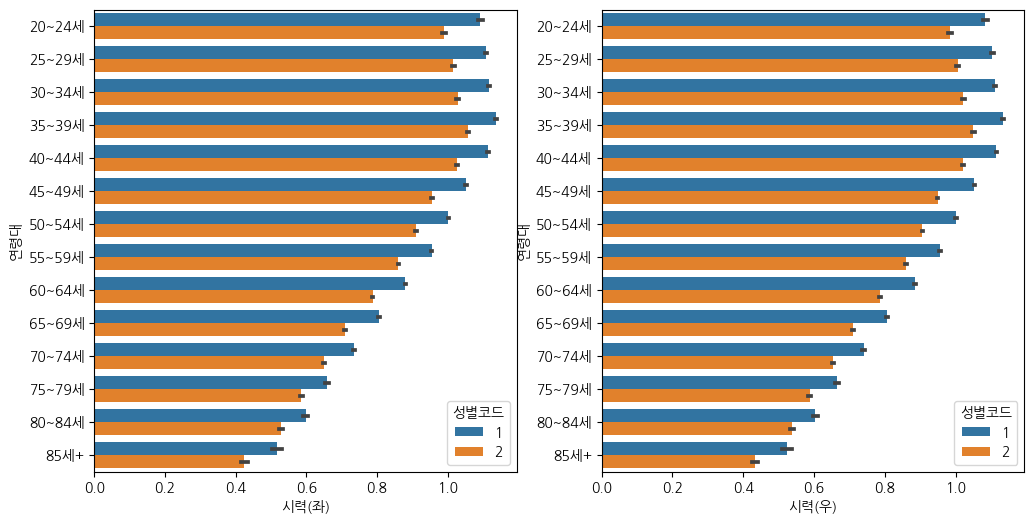

In [21]:
df_sight = df[['시력(좌)','시력(우)','성별코드','연령대']]

df_sight = df_sight[(df_sight['시력(좌)'] != 9.9) & (df_sight['시력(우)'] != 9.9)]

fig, ax = plt.subplots(ncols=2, figsize=(12,6))

# '연령대'를 오름차순으로 정렬하기 위한 순서 리스트 생성
age_order = df_sight['연령대'].unique()
age_order.sort()  # 오름차순 정렬

sns.barplot(x='시력(좌)', y='연령대', data=df_sight, hue='성별코드', ax=ax[0], order=age_order)
sns.barplot(x='시력(우)', y='연령대', data=df_sight, hue='성별코드', ax=ax[1], order=age_order)
plt.show()
